In [ ]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 539kB/s 
     |████████████████████████████████| 2.2MB 12.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200929-cp36-none-any.whl size=43976 sha256=7a0d94b5a6d34a54ce9b8fc126b36fbfae15fd04e86e8af9e506c48bf4b9d864
  Stored in directory: /root/.cache/pip/wheels/89/55/50/16407a05a12ac87ccf596350724c707f5ca77809b25f802b93
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

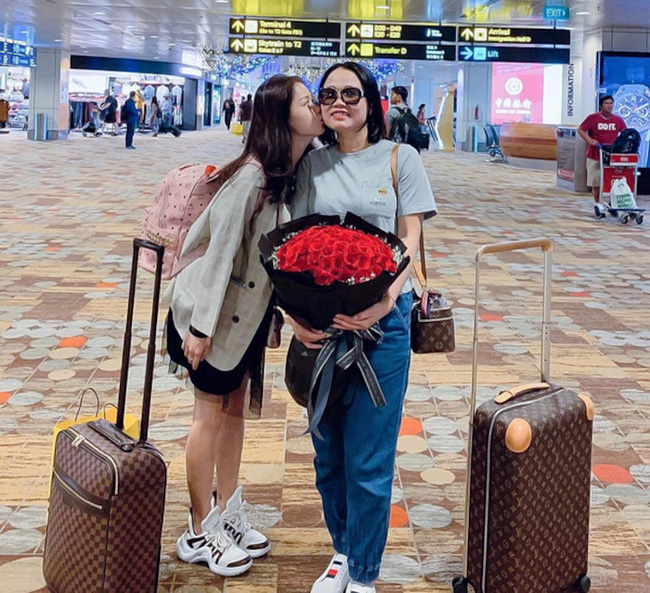

In [ ]:
!wget https://danviet.mediacdn.vn/thumb_w/650/2020/6/27/ha-02-15931922927821500024567.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
print(type(outputs["instances"]))

tensor([ 0, 28,  0,  0,  0, 28,  0, 26,  0,  0,  0,  0,  0, 26,  0],
       device='cuda:0')
Boxes(tensor([[264.8904,  60.2579, 434.4830, 587.8790],
        [ 43.3819, 234.2045, 174.1557, 590.8843],
        [578.1788,  91.3286, 631.0806, 211.3094],
        [121.5557,  92.1063, 140.1904, 149.4459],
        [139.8955,  64.9437, 328.8251, 582.7100],
        [464.6339, 298.1308, 590.8804, 586.7944],
        [222.5529,  96.4595, 234.4441, 129.5790],
        [410.6270, 246.6874, 456.0056, 356.0740],
        [386.0681,  86.7887, 424.1793, 148.3282],
        [237.1585,  94.5212, 253.1602, 137.6058],
        [ 97.0289,  89.2530, 118.3629, 132.5059],
        [415.8078, 102.9807, 427.1425, 128.9691],
        [155.2608,  82.0526, 179.8350, 138.7489],
        [384.9174, 140.0668, 446.3794, 345.7056],
        [144.8238,  92.0773, 160.9950, 137.2198]], device='cuda:0'))
<class 'detectron2.structures.instances.Instances'>


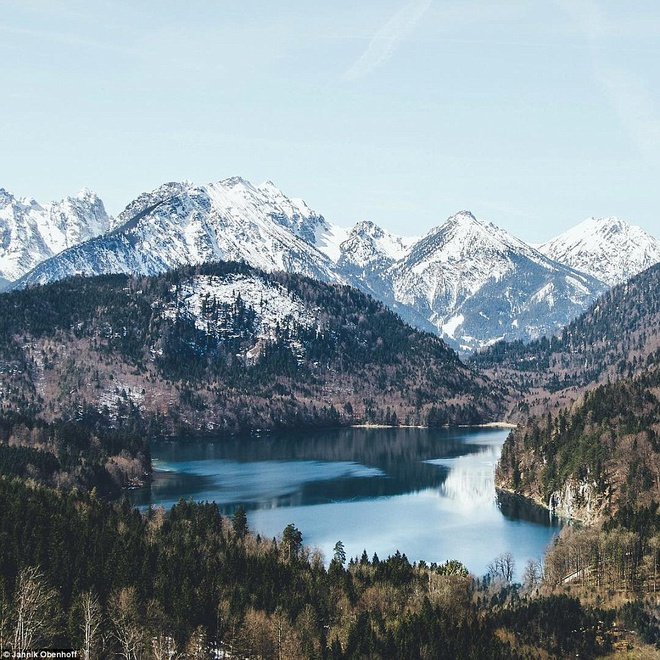

In [ ]:
!wget https://znews-photo.zadn.vn/w660/Uploaded/ngtmns/2016_09_17/5_1.jpg -q -O bg.jpg
background = cv2.imread("./bg.jpg")
cv2_imshow(background)

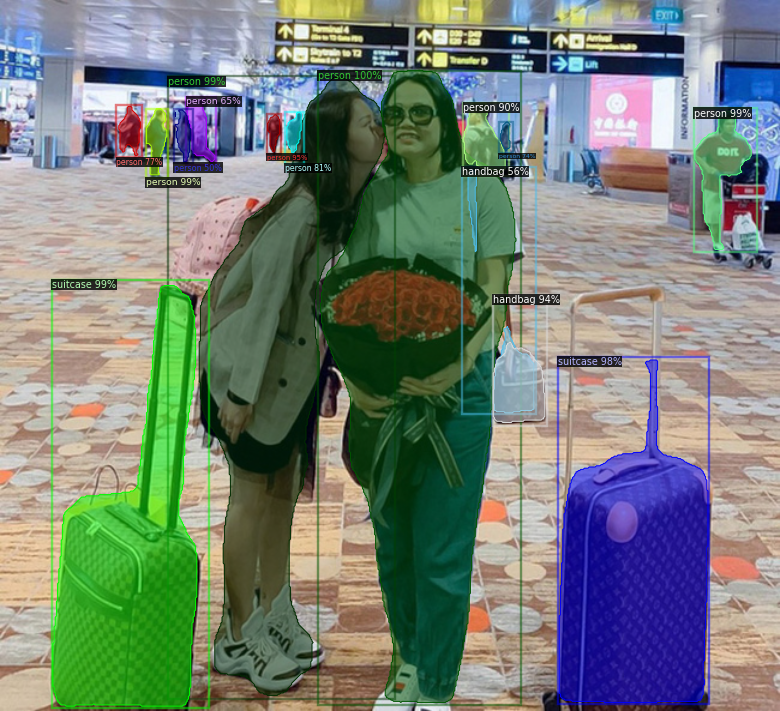

Boxes(tensor([[264.8904,  60.2579, 434.4830, 587.8790],
        [ 43.3819, 234.2045, 174.1557, 590.8843],
        [578.1788,  91.3286, 631.0806, 211.3094],
        [121.5557,  92.1063, 140.1904, 149.4459],
        [139.8955,  64.9437, 328.8251, 582.7100],
        [464.6339, 298.1308, 590.8804, 586.7944],
        [222.5529,  96.4595, 234.4441, 129.5790],
        [410.6270, 246.6874, 456.0056, 356.0740],
        [386.0681,  86.7887, 424.1793, 148.3282],
        [237.1585,  94.5212, 253.1602, 137.6058],
        [ 97.0289,  89.2530, 118.3629, 132.5059],
        [415.8078, 102.9807, 427.1425, 128.9691],
        [155.2608,  82.0526, 179.8350, 138.7489],
        [384.9174, 140.0668, 446.3794, 345.7056],
        [144.8238,  92.0773, 160.9950, 137.2198]], device='cuda:0'))
<class 'detectron2.structures.boxes.Boxes'>
anh nen xam


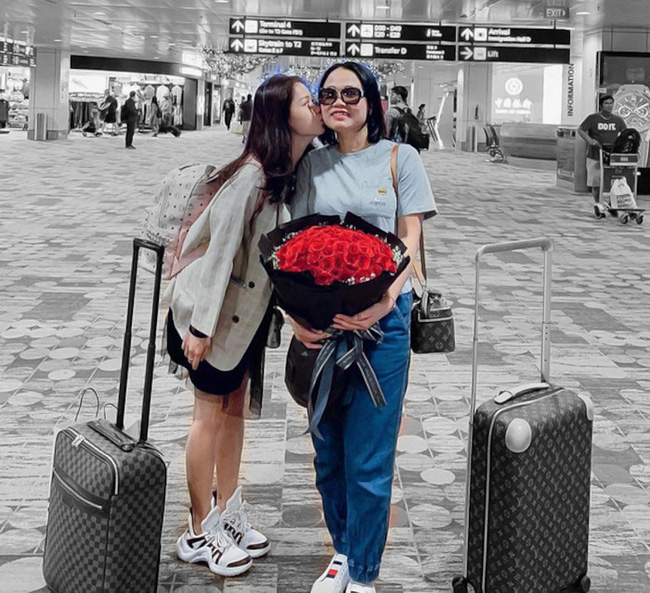

array([[[145., 145., 145.],
        [145., 145., 145.],
        [144., 144., 144.],
        ...,
        [116., 116., 116.],
        [117., 117., 117.],
        [117., 117., 117.]],

       [[149., 149., 149.],
        [150., 150., 150.],
        [150., 150., 150.],
        ...,
        [115., 115., 115.],
        [115., 115., 115.],
        [115., 115., 115.]],

       [[147., 147., 147.],
        [149., 149., 149.],
        [148., 148., 148.],
        ...,
        [114., 114., 114.],
        [115., 115., 115.],
        [115., 115., 115.]],

       ...,

       [[187., 187., 187.],
        [188., 188., 188.],
        [192., 192., 192.],
        ...,
        [142., 142., 142.],
        [146., 146., 146.],
        [150., 150., 150.]],

       [[187., 187., 187.],
        [185., 185., 185.],
        [187., 187., 187.],
        ...,
        [144., 144., 144.],
        [144., 144., 144.],
        [148., 148., 148.]],

       [[185., 185., 185.],
        [186., 186., 186.],
        [187., 1

In [ ]:
from detectron2.utils import visualizer
from detectron2.utils.visualizer import GenericMask


# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

#lay gia tri class name cua dau ra 

def blur_background(predicts, im, objects = [0]):
  object_masks = []
  if not outputs["instances"].has("pred_masks"):
    print("Khong co nguoi nao nhan dien duoc")
  else:
    classes = outputs["instances"].pred_classes if outputs["instances"].has("pred_classes") else None
    masks = np.asarray(outputs["instances"].pred_masks.cpu())
    masks = [GenericMask(x, v.output.height, v.output.width) for x in masks]
    area_img = im.shape[0]*im.shape[1]
    for i in range(len(classes)):
      #loại bỏ những object quá nhỏ và thuộc list loại object truyền vào
      if (classes[i] in objects) and (boxes.area()[i]/area_img) > 0.08:
        object_masks.append(masks[i])

  #ghép các mask lại thành 1 big_mask
  big_mask = np.zeros_like(object_masks[0].mask)
  for i in range(len(object_masks)):
    th, alpha = cv2.threshold(object_masks[i].mask,0,255, cv2.THRESH_BINARY)
    big_mask = cv2.bitwise_or(big_mask, alpha)

  th, alpha = cv2.threshold(big_mask,0,255, cv2.THRESH_BINARY)

  alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2BGR)

  #làm mờ để làm mềm các cạnh
  alpha = cv2.GaussianBlur(alpha, (35,35),0)

  foreground = im.copy()

  #tạo ảnh nền mờ
  blurredImage = cv2.GaussianBlur(foreground, (9, 9), 0)

  foreground = foreground.astype(float)

  blurredImage = blurredImage.astype(float)

  alpha = alpha.astype(float)/255

  print("anh mo nen")

  foreground = cv2.multiply(alpha, foreground)  

  background = cv2.multiply(1 - alpha, blurredImage) 

  outImage = cv2.add(foreground, background)

  cv2_imshow(outImage)
  return outImage

def gray_background(predicts, im, objects = [0]):
  object_masks = []
  if not predicts.has("pred_masks"):
    print("Khong co nguoi nao nhan dien duoc")
  else:
    boxes = predicts.pred_boxes if predicts.has("pred_boxes") else None
    classes = predicts.pred_classes if predicts.has("pred_classes") else None
    masks = np.asarray(predicts.pred_masks.cpu())
    masks = [GenericMask(x, v.output.height, v.output.width) for x in masks]
    area_img = im.shape[0]*im.shape[1]
    for i in range(len(classes)):
      if (classes[i] in objects) and (boxes.area()[i]/area_img) > 0.08:
        object_masks.append(masks[i])

  big_mask = np.zeros_like(object_masks[0].mask)
  for i in range(len(object_masks)):
    th, alpha = cv2.threshold(object_masks[i].mask,0,255, cv2.THRESH_BINARY)
    big_mask = cv2.bitwise_or(big_mask, alpha)

  th, alpha = cv2.threshold(big_mask,0,255, cv2.THRESH_BINARY)

  alpha = cv2.cvtColor(alpha, cv2.COLOR_GRAY2BGR)

  alpha = cv2.GaussianBlur(alpha, (35,35),0)

  foreground = im.copy()

  #tạo nền xám
  background = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

  background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)

  background = background.astype(float)

  foreground = foreground.astype(float)

  alpha = alpha.astype(float)/255

  print("anh nen xam")

  foreground = cv2.multiply(alpha, foreground)  

  background = cv2.multiply(1 - alpha, background) 

  outImage = cv2.add(foreground, background)

  cv2_imshow(outImage)
  return outImage

gray_img = gray_background(outputs["instances"], im)